IMPORTING THE DEPENDENCIES

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn import metrics



DATA COLLECTION AND ANALYSIS

In [56]:
#Load The Data From CSV File To Pandas DataFrame
parkinsons_data = pd.read_csv('/content/parkinson disease .csv')

In [57]:
#Printing The First 5 Rows
parkinsons_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1.0,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1.0,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1.0,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1.0,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1.0,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [6]:
#Printing The Last 5 Rows
parkinsons_data.tail()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
1190,synth_7756,151.028206,179.206312,118.797466,0.006594,0.000040,0.003458,0.003513,0.008731,0.027186,0.265100,0.015080,0.018273,0.024836,0.050788,0.021377,21.884979,0.736271,0.499528,0.727604,-5.772439,0.234236,2.392305,0.210778
1191,synth_5355,161.752472,211.299774,114.784598,0.006397,0.000045,0.003545,0.003017,0.009591,0.028982,0.301784,0.015506,0.018827,0.024254,0.049785,0.020925,21.973752,0.798377,0.499209,0.728558,-5.604039,0.235680,2.362850,0.209570
1192,synth_6356,148.323186,194.399282,118.570170,0.006335,0.000044,0.003483,0.003386,0.008980,0.029598,0.290663,0.015307,0.018145,0.024838,0.051215,0.021530,21.615298,0.771907,0.497459,0.717687,-5.770640,0.233789,2.410545,0.223595
1193,synth_7098,152.106305,209.880095,112.903699,0.005298,0.000041,0.002778,0.003506,0.009388,0.029550,0.289629,0.015220,0.017163,0.025529,0.049023,0.026806,21.561977,0.704315,0.486495,0.722529,-5.677169,0.236918,2.427505,0.218734
1194,synth_1997,151.964173,211.553642,120.752900,0.005573,0.000040,0.003039,0.002910,0.011217,0.031296,0.335169,0.015293,0.016371,0.023404,0.049004,0.020198,21.637952,0.735387,0.508520,0.720055,-5.884754,0.228012,2.395277,0.197326


In [7]:
#Number of Rows And Columns In The DataFrame
parkinsons_data.shape

(1195, 24)

In [8]:
#Knowing More Information of The Dataset
parkinsons_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1195 entries, 0 to 1194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1195 non-null   object 
 1   MDVP:Fo(Hz)       1195 non-null   float64
 2   MDVP:Fhi(Hz)      1195 non-null   float64
 3   MDVP:Flo(Hz)      1195 non-null   float64
 4   MDVP:Jitter(%)    1195 non-null   float64
 5   MDVP:Jitter(Abs)  1195 non-null   float64
 6   MDVP:RAP          1195 non-null   float64
 7   MDVP:PPQ          1195 non-null   float64
 8   Jitter:DDP        1195 non-null   float64
 9   MDVP:Shimmer      1195 non-null   float64
 10  MDVP:Shimmer(dB)  1195 non-null   float64
 11  Shimmer:APQ3      1195 non-null   float64
 12  Shimmer:APQ5      1195 non-null   float64
 13  MDVP:APQ          1195 non-null   float64
 14  Shimmer:DDA       1195 non-null   float64
 15  NHR               1195 non-null   float64
 16  HNR               1195 non-null   float64


In [9]:
#Checking For Missing Values In Each Column
parkinsons_data.isnull().sum()

,0
name,0
MDVP:Fo(Hz),0
MDVP:Fhi(Hz),0
MDVP:Flo(Hz),0
MDVP:Jitter(%),0
MDVP:Jitter(Abs),0
MDVP:RAP,0
MDVP:PPQ,0
Jitter:DDP,0
MDVP:Shimmer,0


In [10]:
#Knowing Statistical Measures About The Data
parkinsons_data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000
mean,154.312848,197.246916,116.332971,0.006221,0.000044,0.003306,0.003428,0.009920,0.029671,0.282587,0.015678,0.017855,0.024084,0.047084,0.024880,21.895992,0.754117,0.498054,0.718214,-5.683541,0.226451,2.382126,0.206771
std,17.124313,37.804828,17.953210,0.002001,0.000014,0.001228,0.001140,0.003678,0.007781,0.080554,0.004195,0.004966,0.007005,0.012609,0.016717,1.829752,0.178176,0.043021,0.022905,0.451130,0.034527,0.157783,0.037229
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,150.616420,189.666263,112.204966,0.005769,0.000041,0.003012,0.003173,0.009089,0.027992,0.264388,0.014802,0.016784,0.022510,0.044325,0.020837,21.550002,0.726172,0.489091,0.713742,-5.779205,0.219263,2.351569,0.199061
50%,154.117666,197.198334,116.100612,0.006188,0.000044,0.003282,0.003397,0.009845,0.029575,0.280555,0.015578,0.017813,0.024020,0.046820,0.024486,21.913050,0.758665,0.497781,0.718387,-5.681992,0.226621,2.382482,0.207056
75%,157.491303,204.071906,119.290367,0.006557,0.000046,0.003530,0.003618,0.010552,0.031008,0.296840,0.016432,0.018666,0.025239,0.049418,0.027661,22.274815,0.797437,0.506417,0.722957,-5.595197,0.232901,2.411210,0.213564
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,0.056470,0.079400,0.137780,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


CORRELATION

1. POSITIVE CORRELATION

2. NEGATIVE CORRELATION

<Axes: >

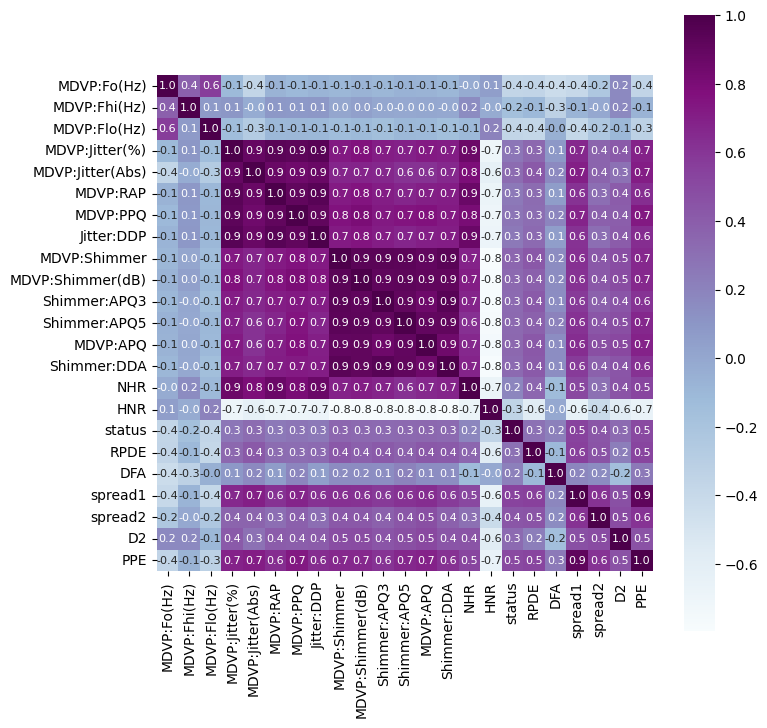

In [70]:
#Calculate the correlation matrix, excluding non-numeric columns
correlation = parkinsons_data.select_dtypes(include=np.number).corr()
#The above line selects columns with numeric data types before calculating the correlation.

#Constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='BuPu')

In [62]:
#Correlation values of Parkinson
print(correlation['status'])

MDVP:Fo(Hz)        -0.362827
MDVP:Fhi(Hz)       -0.159528
MDVP:Flo(Hz)       -0.362129
MDVP:Jitter(%)      0.268528
MDVP:Jitter(Abs)    0.321233
MDVP:RAP            0.250416
MDVP:PPQ            0.276525
Jitter:DDP          0.252708
MDVP:Shimmer        0.349813
MDVP:Shimmer(dB)    0.335911
Shimmer:APQ3        0.333282
Shimmer:APQ5        0.337126
MDVP:APQ            0.345310
Shimmer:DDA         0.329220
NHR                 0.179734
HNR                -0.345324
status              1.000000
RPDE                0.292920
DFA                 0.220340
spread1             0.539539
spread2             0.433070
D2                  0.326976
PPE                 0.504797
Name: status, dtype: float64


In [11]:
#Distribution of Target Variable
parkinsons_data['status'].value_counts()

,count
status,
1.000000,147
0.000000,48
0.753214,1
0.758071,1
0.743590,1
...,...
0.790818,1
0.740938,1
0.758922,1


1 -> Parkinson's Positive

0 -> Healthy

In [12]:
#Grouping The Data Based on The Target Variable
numeric_features = parkinsons_data.select_dtypes(include=np.number).columns
parkinsons_data.groupby('status')[numeric_features].mean()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,,,
0.000000,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,0.009504,0.010509,0.013305,0.028511,0.011483,24.678750,0.000000,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
0.575556,149.198447,207.415543,111.482874,0.006078,0.000040,0.003701,0.003331,0.008534,0.031243,0.275112,0.014298,0.018084,0.024103,0.049216,0.026544,21.318538,0.575556,0.501891,0.725354,-5.564950,0.209877,2.380827,0.206444
0.615667,153.886563,199.401599,121.363146,0.005983,0.000047,0.003138,0.003550,0.009534,0.026432,0.282593,0.016295,0.020591,0.023219,0.048064,0.034362,22.159939,0.615667,0.493306,0.721284,-5.490661,0.214860,2.363735,0.225016
0.625442,152.157607,207.259044,116.464707,0.005995,0.000044,0.003535,0.003458,0.010400,0.032165,0.256628,0.014990,0.018284,0.024626,0.047195,0.020836,21.418531,0.625442,0.477161,0.718057,-5.581980,0.225841,2.369936,0.211201
0.627344,153.080931,202.680710,113.269057,0.006523,0.000046,0.003239,0.003415,0.009060,0.029728,0.271875,0.013682,0.016392,0.024869,0.048402,0.022129,21.939683,0.627344,0.498502,0.723707,-5.823857,0.221358,2.384068,0.195353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.865840,152.466878,192.782541,120.296634,0.005874,0.000044,0.003664,0.003540,0.010088,0.029207,0.309389,0.014965,0.017563,0.026209,0.048204,0.027789,21.525414,0.865840,0.493623,0.717218,-5.698483,0.218747,2.350404,0.193617
0.875026,159.428126,188.703201,113.941707,0.006447,0.000041,0.002958,0.003123,0.008723,0.029753,0.290140,0.016068,0.015813,0.025242,0.043531,0.025270,21.984162,0.875026,0.510846,0.718195,-5.670870,0.228618,2.354472,0.197873
0.877561,155.771643,195.171568,115.100600,0.005912,0.000049,0.002894,0.003737,0.009543,0.026965,0.313777,0.015352,0.017538,0.025692,0.044149,0.027168,20.991225,0.877561,0.500720,0.719314,-5.711304,0.230594,2.399800,0.209875


DATA PRE - PROCESSING

SEPARATING THE FEATURES AND TARGET

In [13]:
X = parkinsons_data.drop(columns=['name','status'], axis=1)
Y = parkinsons_data['status']

In [14]:
print(X)

      MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  ...   spread2        D2       PPE
0      119.992000    157.302000     74.997000  ...  0.266482  2.301442  0.284654
1      122.400000    148.650000    113.819000  ...  0.335590  2.486855  0.368674
2      116.682000    131.111000    111.555000  ...  0.311173  2.342259  0.332634
3      116.676000    137.871000    111.366000  ...  0.334147  2.405554  0.368975
4      116.014000    141.781000    110.655000  ...  0.234513  2.332180  0.410335
...           ...           ...           ...  ...       ...       ...       ...
1190   151.028206    179.206312    118.797466  ...  0.234236  2.392305  0.210778
1191   161.752472    211.299774    114.784598  ...  0.235680  2.362850  0.209570
1192   148.323186    194.399282    118.570170  ...  0.233789  2.410545  0.223595
1193   152.106305    209.880095    112.903699  ...  0.236918  2.427505  0.218734
1194   151.964173    211.553642    120.752900  ...  0.228012  2.395277  0.197326

[1195 rows x 22 columns]


In [15]:
print(Y)

0       1.000000
1       1.000000
2       1.000000
3       1.000000
4       1.000000
          ...   
1190    0.736271
1191    0.798377
1192    0.771907
1193    0.704315
1194    0.735387
Name: status, Length: 1195, dtype: float64


SPLITTING THE DATA TO TRAINING DATA & TEST DATA

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


In [17]:
print(X.shape, X_train.shape, X_test.shape)

(1195, 22) (836, 22) (359, 22)


DATA STANDARDIZATION

In [23]:
#Standardize The Features
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
print(X_train)

[[ 1.31492287e-01 -2.20579763e-01  1.00625102e-01 ...  2.82492178e-02
   4.36086661e-03 -8.56552645e-02]
 [-1.53131960e+00  6.61470947e+00 -1.55121342e+00 ...  1.48028845e+00
   1.80162727e+00 -1.40582971e+00]
 [-1.36172658e-02 -1.10515123e-01 -2.68833163e-01 ...  3.75139359e-02
   9.34757137e-03 -1.30784911e-02]
 ...
 [ 8.41754809e-02 -2.82497918e-01 -4.16427680e-02 ...  1.90265101e-01
   2.55395647e-03 -4.22972503e-01]
 [ 1.31355105e-01 -8.51848875e-02 -3.33294973e-01 ...  1.93961544e-01
  -2.93130909e-02 -2.04396885e-01]
 [ 1.91331769e-01 -2.46276187e-01  2.68406769e-03 ... -3.38592409e-01
  -2.17976107e-01  2.42559798e-01]]


MODEL TRAINING

SUPPORT VECTOR MACHINE MODEL

In [54]:
#Create And Train The SVM Model
from sklearn.svm import SVR
svm_model = SVR(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(X_train, Y_train)

SVR()

In [31]:
#Make Predictions
Y_pred = svm_model.predict(X_test)

In [42]:
model = svm.SVC(kernel='linear')

MODEL EVALUATION : LINEAR REGRESSOR

In [48]:
#Accuracy Score on Training Data
X_train_prediction = svm_model.predict(X_train)

#Calculate Regression Metrics
r2 = r2_score(Y_train, X_train_prediction)
mse = mean_squared_error(Y_train, X_train_prediction)
mae = mean_absolute_error(Y_train, X_train_prediction)

print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

R-squared: 0.8926872584244137
Mean Squared Error: 0.0035142587088026925
Mean Absolute Error: 0.04655305160175094


MODEL EVALUATION : RANDOM FOREST REGRESSOR

In [73]:
regressor = RandomForestRegressor(n_estimators=100)


In [74]:
regressor.fit(X_train,Y_train)


RandomForestRegressor()

In [75]:
#Prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [76]:
print(test_data_prediction)


[0.75586397 0.76433019 0.75520296 0.76748473 0.97683678 0.75785313
 0.75227288 0.76301925 0.57       0.7568396  0.74824994 0.02
 0.48289577 0.77250647 0.74442201 0.74367998 0.78166485 0.77450499
 0.74710666 0.77032241 0.80646456 0.76360399 0.7547602  0.80150387
 0.75853301 0.75752217 0.38       0.75922053 0.74263406 0.75368525
 0.74401692 0.83614729 0.78260433 0.75505385 0.75865983 0.90437859
 0.75880925 0.93918905 0.77713781 0.75397822 0.7539021  1.
 0.74964493 0.79212519 0.77126497 0.76250226 0.75411612 0.99
 0.23       0.75814705 0.74622241 0.7550205  0.74296921 0.74358951
 0.75388071 0.75732586 0.77870545 0.75720697 0.75017754 0.75881597
 0.75317731 0.75382357 0.74280517 0.26       0.73519788 0.76217669
 0.42460305 0.7430726  0.7709911  0.74739717 0.75446716 0.77060531
 0.9641617  0.97259235 0.97705409 0.44801011 0.77162576 0.97569282
 0.75096593 0.75754546 0.75758599 0.88156085 0.73882396 0.77317204
 0.76132426 0.75364676 0.75884371 0.75419806 0.77311325 0.74670104
 0.76156722 0.7

In [80]:
#R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.5496957568844232


In [81]:
Y_test = list(Y_test)


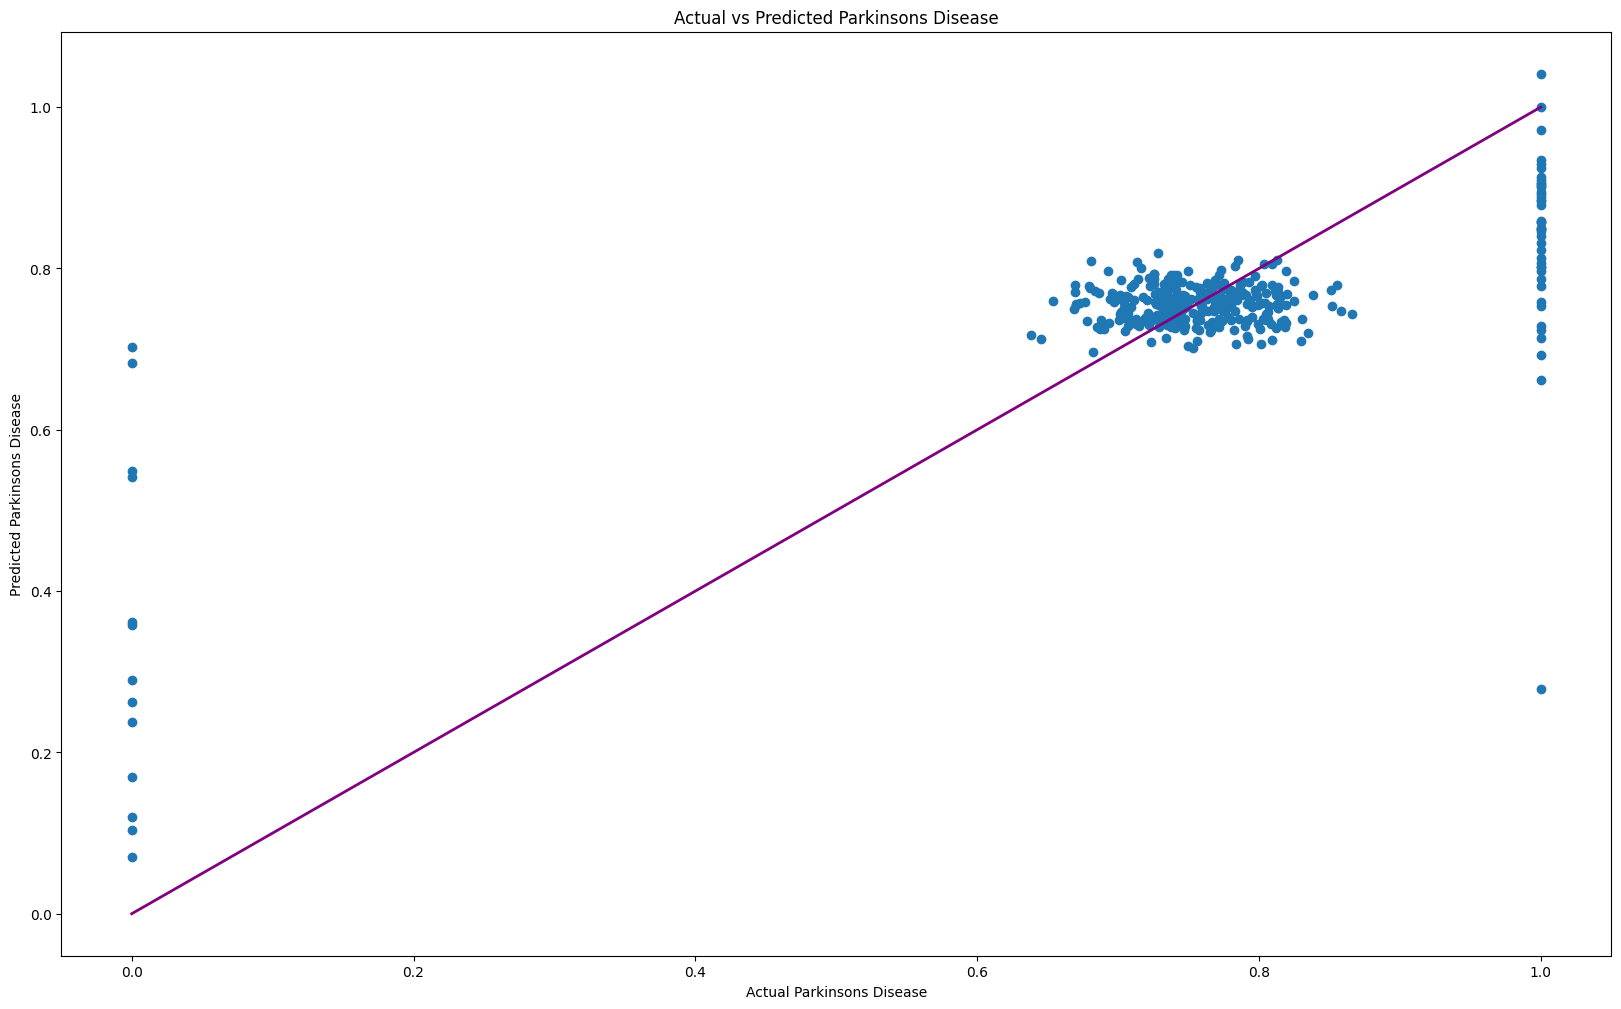

In [87]:
plt.figure(figsize=(20,12))
plt.scatter(Y_test, Y_pred)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='purple', lw=2)
plt.xlabel('Actual Parkinsons Disease')
plt.ylabel('Predicted Parkinsons Disease')
plt.title('Actual vs Predicted Parkinsons Disease')
plt.show()

BUILDING A PREDICITVE SYSTEM

In [46]:
input_data = (197.07600,206.89600,192.05500,0.00289,0.00001,0.00166,0.00168,0.00498,0.01098,0.09700,0.00563,0.00680,0.00802,0.01689,0.00339,26.77500,0.422229,0.741367,-7.348300,0.177551,1.743867,0.085569)

from sklearn.svm import SVR
svm_model = SVR(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(X_train, Y_train)

#Changing Input Data To A numpy Array
input_data_as_numpy_array = np.asarray(input_data)

#Reshape The numpy Array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

#Standardize The Data
std_data = scaler.transform(input_data_reshaped)

prediction = svm_model.predict(std_data)
print(prediction)


if (prediction[0] == 0):
  print("The Person does not have Parkinsons Disease")

else:
  print("The Person has Parkinsons")


[0.75815472]
The Person has Parkinsons
